# Principal Component Analysis (PCA)


*Let's start by importing some libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


*It can be observed that there are a total of 5 columns, out of which, 4 are numerical and the remaining 1 is categorical.*

In [4]:
np.unique(data['iris'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
X = data.iloc[:, :-1]
y = data['iris']

*Let's first standardize the numerical columns as follows.*

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
cols_to_transform = list(X.columns)
cols_to_transform

['sepal length', 'sepal width', 'petal length', 'petal width']

In [11]:
X[cols_to_transform] = scaler.fit_transform(X[cols_to_transform])

In [13]:
X.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


*Let's now apply PCA on the data as follows.*

In [14]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

In [15]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
components = pca.components_         # These are the Principal Components (Eigen vectors)
components

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [23]:
exp_variance = pca.explained_variance_ratio_
exp_variance

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

*The first Principal compenent explains about 72% of variance and the second one explains about 23%, together about 95%. Rest are negligible.*

*Let's also make a Scree plot for visualizing the cumulative contribution of Principal components.*

In [26]:
cumulative = np.cumsum(exp_variance)
cumulative

array([0.72770452, 0.95800975, 0.99484807, 1.        ])

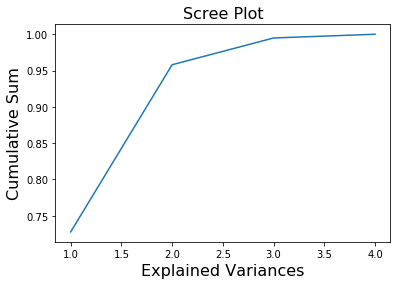

In [28]:
sns.lineplot(x=range(1, len(cumulative)+1), y=cumulative)
plt.xlabel('Explained Variances', fontsize=16)
plt.ylabel('Cumulative Sum', fontsize=16)
plt.title('Scree Plot', fontsize=16)
plt.show()

*It can be visualized as well that the first two principal components explain about 95% of the variance.*

*Now, let's use PCA for only 2 components as follows.*

In [32]:
pca_2 = PCA(n_components=2, random_state=100)

In [40]:
new_data = pca_2.fit_transform(X)
new_data = pd.DataFrame(new_data, columns=['PC_1', 'PC_2'])
new_data.head()

,PC_1,PC_2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [41]:
final_df = pd.concat([new_data, y], axis=1)
final_df.head()

,PC_1,PC_2,iris
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


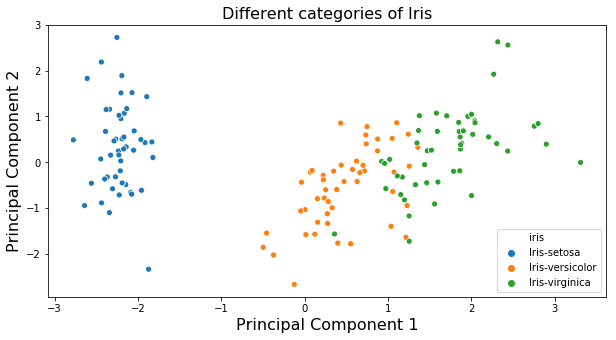

In [46]:
plt.figure(figsize=(10,5))
sns.scatterplot(final_df['PC_1'], final_df['PC_2'], hue=final_df['iris'])
plt.xlabel('Principal Component 1', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.title('Different categories of Iris', fontsize=16)
plt.show()

# Conclusion

- `Setosa` is well segregated from the other two iris categories.
- Although the iris categories `Vesicolor` and `Virginica` are also separated from each other, 